# Изучение NetCDF4

- начал с курса: https://www.youtube.com/watch?v=699jkjLJGyM&list=PLpykv05eUR0rAuaLnybkZORnCwyND4CV4
- документация: https://unidata.github.io/netcdf4-python/

**Стуктура** netCDF в xarray:
 - Dimensions
 - Coordinates
 - Data variables
 - Indexes
 - Attributes

In [29]:
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime, timezone

In [4]:
#netcdf_file = "/home/voland/Documents/NetCdf4/daymet_v4_vp_monavg_na_2023.nc"
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'

xrds = xr.open_dataset(netcdf_file)

### Эксперементы с ключами .nc

In [7]:
xrds.attrs['Conventions']

'CF-1.8, ACDD-1.3, OceanSITES Manual 1.4'

In [10]:
xrds.dims

FrozenMappingWarningOnValuesAccess({'PRES': 320})

In [21]:
temperature = xrds.data_vars['TEMP'].values
temperature

array([3.735, 3.738, 3.739, 3.741, 3.736, 3.737, 3.736, 3.742, 3.736,
       3.738, 3.783, 3.833, 3.838, 3.837, 3.83 , 3.806, 3.792, 3.79 ,
       3.814, 3.846, 3.858, 3.833, 3.815, 3.817, 3.814, 3.812, 3.792,
       3.709, 3.704, 3.642, 3.582, 3.546, 3.512, 3.484, 3.368, 3.297,
       3.165, 3.106, 3.094, 3.094, 3.102, 3.079, 3.094, 3.076, 3.035,
       3.009, 2.992, 2.981, 2.954, 2.933, 2.903, 2.874, 2.85 , 2.824,
       2.801, 2.787, 2.764, 2.713, 2.711, 2.705, 2.701, 2.696, 2.682,
       2.665, 2.651, 2.647, 2.642, 2.635, 2.624, 2.588, 2.604, 2.608,
       2.593, 2.507, 2.472, 2.468, 2.46 , 2.453, 2.441, 2.43 , 2.431,
       2.43 , 2.431, 2.433, 2.43 , 2.417, 2.394, 2.382, 2.361, 2.335,
       2.32 , 2.303, 2.275, 2.267, 2.263, 2.277, 2.27 , 2.265, 2.262,
       2.256, 2.241, 2.216, 2.201, 2.191, 2.176, 2.135, 2.11 , 2.091,
       2.071, 2.064, 2.103, 2.106, 2.099, 2.095, 2.092, 2.088, 2.082,
       2.085, 2.093, 2.09 , 2.089, 2.085, 2.054, 2.022, 2.019, 2.021,
       2.026, 2.027,

In [25]:
temp_var_attrs = xrds.data_vars['TEMP'].attrs['standard_name']
temp_var_attrs

'sea_water_temperature'

### Строю графики из NetCDF 

In [4]:
url = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 2kB
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 44B 323.0 200.3 120.1 ... 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 88B ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 88B ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 88B ...
    EVENTID_TOTAL        (DEPTH) |S64 704B ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 88B ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 88B ...
    FILTERED_VOL_10um    (DEPTH) float64 88B ...
    EVENTID_10um         (DEPTH) |S64 704B ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

array([0.01565072, 0.01550788, 0.01912119, 0.02236113,        nan,
       0.07194841, 0.28370929, 1.12279562, 6.07793473, 2.99329871,
       1.90354194])

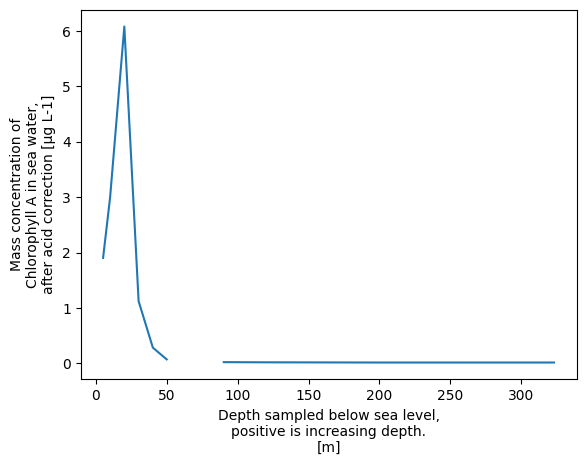

In [43]:
xrds['CHLOROPHYLL_A_TOTAL'].plot()
xrds['CHLOROPHYLL_A_TOTAL'].values

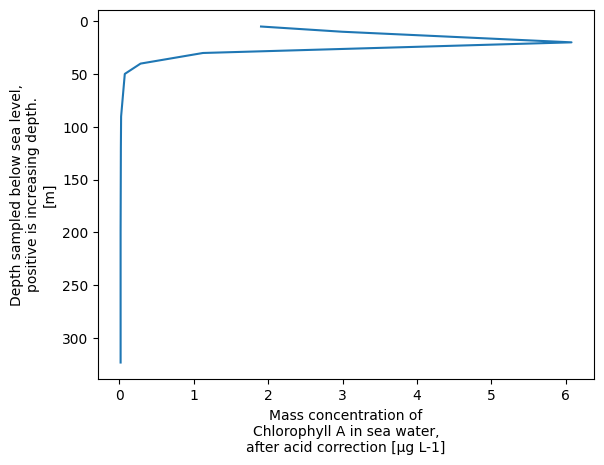

In [44]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'), y = 'DEPTH', yincrease=False)

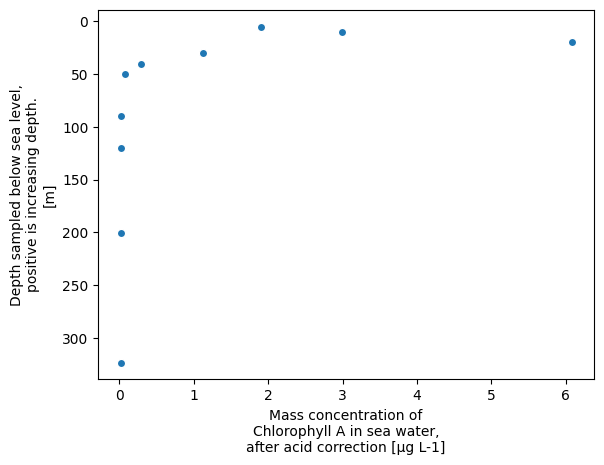

In [47]:
xrds.plot.scatter(
    x='CHLOROPHYLL_A_TOTAL',
    y='DEPTH',
    yincrease=False,
)

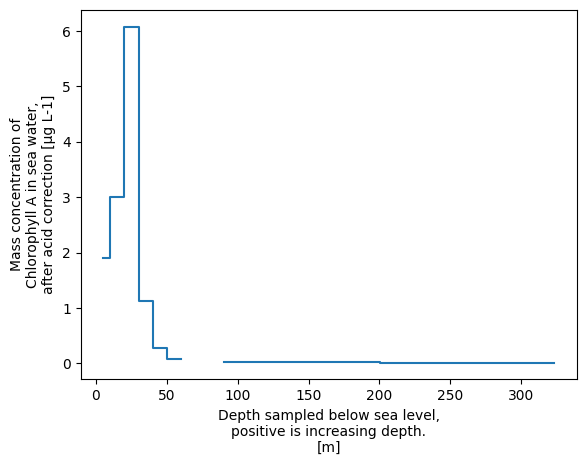

In [49]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.step()

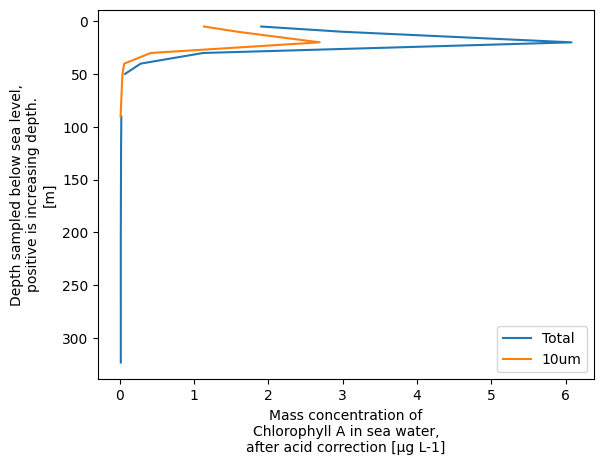

In [53]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='Total')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')
plt.legend()

In [8]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)

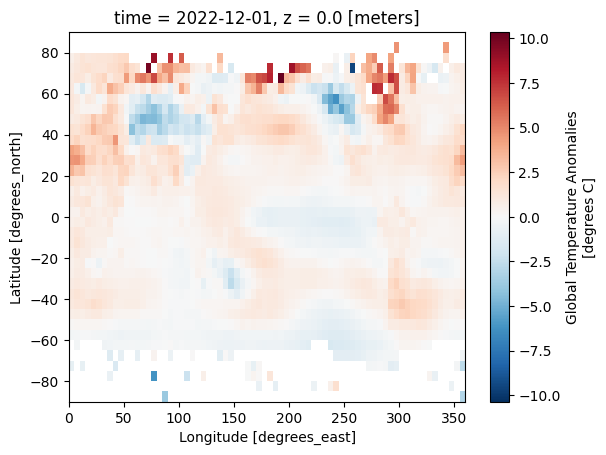

In [11]:
desired_date = '2022-12-01'
data_for_desired_date = xrds.sel(time=desired_date)
data_for_desired_date['anom'].plot()

Text(0.5, 1.0, 'Global Surface Temperature Anomalies for 2001-06-01')

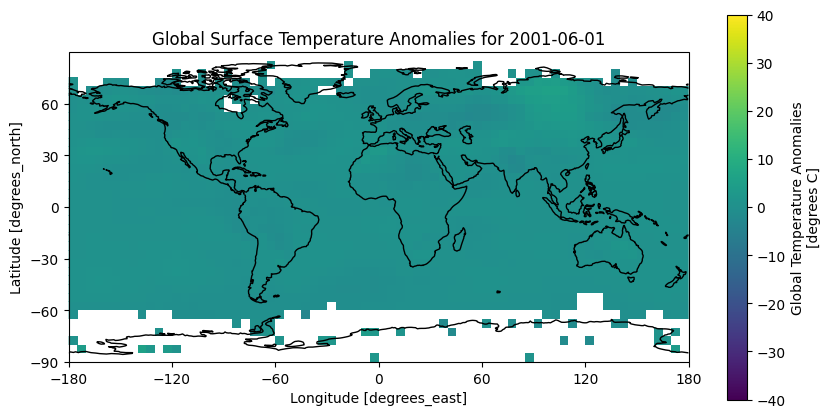

In [27]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())

desired_date = '2001-06-01'
data_for_desired_date = xrds.sel(time=desired_date)

vmin = xrds['anom'].attrs['valid_min']
vmax = xrds['anom'].attrs['valid_max']
vmin_abs = abs(vmin)
abs_max = max(vmin_abs, vmax)

ax.coastlines() # добавление береговой линии
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 90, 30), crs=ccrs.PlateCarree())

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')


data_for_desired_date['anom'].plot(vmin=-abs_max, vmax=abs_max)

plt.title(f'Global Surface Temperature Anomalies for {desired_date}')

### NetCDF to dataframe

In [28]:
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'
xrds = xr.open_dataset(netcdf_file)

In [29]:
df = xrds.to_dataframe()
#df.to_csv('netCDF_data.csv') # сохраняю файл в .csv
#df.to_excel('netCDF_data.xlsx') # сохраняю файл в .xlsx

In [39]:
xrds

<xarray.Dataset> Size: 44kB
Dimensions:        (time: 1, PRES: 320)
Coordinates:
  * time           (time) datetime64[ns] 8B 1990-01-12
  * PRES           (PRES) float32 1kB 1.0 2.0 3.0 4.0 ... 318.0 319.0 320.0
Data variables: (12/33)
    PRES_QC        (time, PRES) float32 1kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    TEMP           (time, PRES) float32 1kB 3.735 3.738 3.739 ... 1.287 1.287
    PSAL           (time, PRES) float32 1kB 34.25 34.26 34.26 ... 34.92 34.92
    FLU2           (time, PRES) float32 1kB 0.221 0.214 0.219 ... 0.027 0.0
    CNDC           (time, PRES) float32 1kB 31.69 31.7 31.7 ... 30.23 30.23
    DENS           (time, PRES) float32 1kB 27.21 27.21 27.21 ... 27.94 27.94
    ...             ...
    OXYOCPVL-1_QC  (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SPAR_QC        (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PAR_QC         (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PSAL-2_QC      (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TEMP-2_QC      (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ATTNZS01_QC    (time, PRES) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    station_name:                    P1 (NLEG01)
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    date_created:                    2022-08-08T12:44:34Z
    doi:                             10.21335/NMDC-2085836005-P1_NLEG01-1
    title:                           CTD_station_P1_NLEG01-1_-_Nansen_Legacy_...
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...

In [34]:
timesclice = xrds.sel(time=dt.datetime(1990, 1, 12), method='nearest')
timesclice

KeyError: "'time' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'PRES': 320})"

### Create netCDF

**data_vars** должен по кол-ву элементов обязательно соответсвовать **coords**
для каждой coords и data vars должен быть свой attrs

#### CF Standard Names List
https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

#### Attribute Convention for Data Discovery 
https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

#### Metadata
- метаданные, которые описывают файл в целом (обычно лежат в атрибутах)
- **Global attributes**
```xrds.attrs['title'] = 'My netCDF4 file 🧐🤔'```

- **Variable attributes**
```xrds['time'].attrs['units'] ='seconds 2025-05-28T21:00:00Z'```



In [34]:
depths = [0, 19, 12, 3]
latitude = [78, 79, 80]
longitude = [20,21,22]

start_time = np.datetime64('2025-05-28T21:00:00')
end_time = start_time + np.timedelta64(24, 'h')
timestamps = np.arange(start_time, end_time, np.timedelta64(1, 'h'))

time = [0,1,2,3,4,5]
units = 'hours since 2025...'

chlorophyll_a = [21, 22, 32.1, 15.4]

wind_speed = np.random.randint(0,10,size=(3,3))# скорость ветра

tempurature = np.random.randint(20, 30, size=(len(latitude), len(longitude), len(depths)))

xrds = xr.Dataset(
    coords = {
        'depth': depths,
        'latitude': latitude,
        'longitude': longitude,
        'time': timestamps,
    }, 
    data_vars = {
        'chlorophyll_a': ('depth', chlorophyll_a),
        'wind_speed': (['latitude', 'longitude'], wind_speed),
        'temperature': (['latitude', 'longitude', 'depths'], tempurature)
    }
)

In [53]:

# Metadata

# Global attributes
xrds.attrs['title'] = 'My netCDF4 file 🧐🤔'

xrds.attrs['gespatial_lat_min'] = min(xrds['latitude'].values)
xrds.attrs['gespatial_lat_max'] = max(xrds['latitude'].values)

xrds.attrs['gespatial_lon_min'] = min(xrds['longitude'].values)
xrds.attrs['gespatial_lon_max'] = max(xrds['longitude'].values)

dtnow = dt.now(timezone.utc).strftime("%Y-%m-%dT%H:%M:%SZ")

xrds.attrs['data_created'] = dtnow

# Variable attributes 
#xrds['time'].attrs['units'] ='seconds 2025-05-28T21:00:00Z'
xrds['time'].encoding.update({
    'units': 'hours since 2025-05-28 21:00:00',
    'calendar': 'proleptic_gregorian'
})


xrds['latitude'].attrs = {
    'standard_name': 'latitude',
    'long_name': 'latitude',
    'units': 'degrees_north',
    'coverage_content_type': 'coordinate',
}

xrds['longitude'].attrs = {
    'standard_name': 'longitude',
    'long_name': 'longitude',
    'units': 'degrees_north',
    'coverage_content_type': 'coordinate',
}

xrds['depth'].attrs = {
    'standard_name': 'depth',
    'long_name': 'water depth',
    'units': 'm',
    'positive': 'down'
}

# Variable attributes
xrds['chlorophyll_a'].attrs = {
    'units': 'μg/L',
    'long_name': 'Chlorophyll-a concentration'
}

xrds['wind_speed'].attrs = {
    'units': 'm/s',
    'long_name': 'Wind speed at 10m'
}

xrds['temperature'].attrs = {
    'units': '°C',
    'long_name': 'Sea water temperature'
}


In [54]:
xrds

<xarray.Dataset> Size: 9kB
Dimensions:        (depth: 4, time: 24, latitude: 3, longitude: 3)
Coordinates:
  * time           (time) datetime64[s] 192B 2025-05-28T21:00:00 ... 2025-05-...
  * latitude       (latitude) float64 24B 78.0 79.0 80.0
  * longitude      (longitude) float64 24B 20.0 21.0 22.0
  * depth          (depth) int64 32B 0 19 12 3
Data variables:
    chlorophyll_a  (depth) float64 32B 21.0 22.0 32.1 15.4
    wind_speed     (time, latitude, longitude) int64 2kB 8 9 7 8 0 ... 1 8 9 1 5
    temperature    (time, latitude, longitude, depth) int64 7kB 22 24 ... 24 27
Attributes:
    title:               My netCDF4 file 🧐🤔
    geospatial_lat_min:  78.0
    geospatial_lat_max:  80.0
    geospatial_lon_min:  20.0
    geospatial_lon_max:  22.0
    date_created:        2025-05-29T10:55:05Z
    gespatial_lat_min:   78.0
    gespatial_lat_max:   80.0
    gespatial_lon_min:   20.0
    gespatial_lon_max:   22.0
    data_created:        2025-05-29T10:56:09Z

In [56]:
#xrds.to_netcdf('/home/voland/dev/projects/nss_lab/my_netcdf_file.nc', mode='w', format='NETCDF4')
xrds.to_netcdf('my_netcdf_file.nc')
